# Why use a Pre-trained Model?

Benefit from others' research and compute time and use a state-of-the-art network.  
- Hyperparameter tuning takes time and effort  
- Training takes lots of compute (time and money)

Models are shared and organized in [Model zoos](https://modelzoo.co/)  

Some models are included in Keras: [Models that come with Keras](https://keras.io/applications/)

# Load Keras and other imports

#### Examples were based on content in Chapter 5 of Deep Learning with Python https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438

In [1]:
import os

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.preprocessing import image

keras.__version__

In [3]:
# Suppress deprecation warnings
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# Predict classification of images from Kaggle Dogs vs Cats competition

Download the [Cats vs Dogs Dataset here](https://www.kaggle.com/c/dogs-vs-cats/data)  

#### Split into train, validation, and test sets

In [ ]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'data/dogs-vs-cats/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = 'data/dogs-vs-cats/dogs-vs-cats_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

#### Load some images

In [15]:
dog_img_dir = os.path.join(base_dir, 'train/dogs')
cat_img_dir = os.path.join(base_dir, 'train/cats')

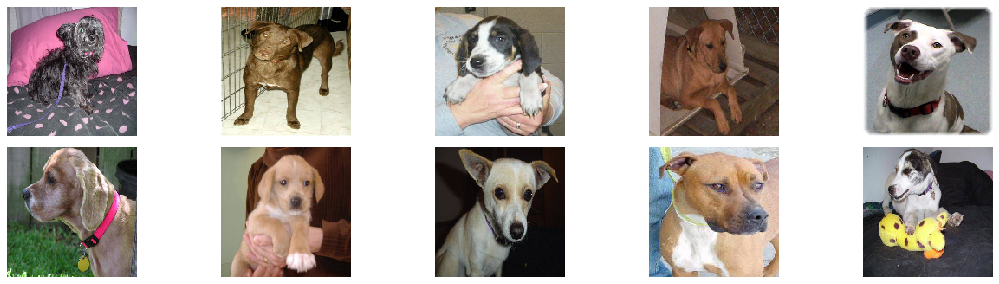

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

for i, fn in enumerate(os.listdir(dog_img_dir)[:10]):
    plt.subplot(3, 5, i+1)
    img = image.load_img(os.path.join(dog_img_dir, fn), target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()

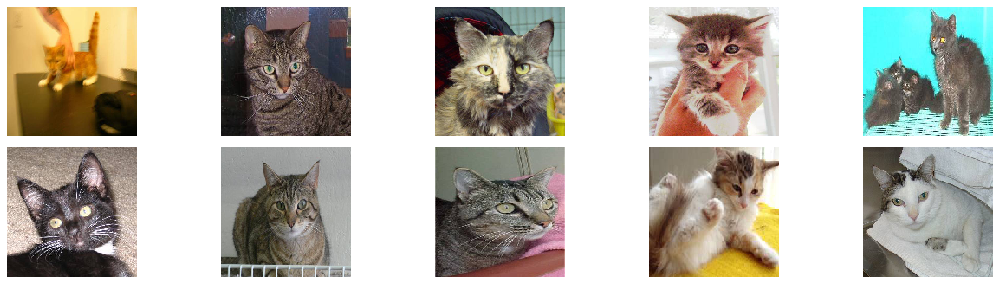

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

for i, fn in enumerate(os.listdir(cat_img_dir)[:10]):
    plt.subplot(3, 5, i+1)
    img = image.load_img(os.path.join(cat_img_dir, fn), target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()

#### Create a model from a pre-trained network

Keras comes with a number of pre-trained models https://keras.io/applications

The first time you run this, the data will be downloaded.

Using VGG16 Model (2014) https://arxiv.org/abs/1409.1556 

1000 classification categories.

Trained on ImageNet: http://www.image-net.org/  

> The ImageNet project is a large visual database designed for use in visual object recognition software research. More than 14 million[1][2] images have been hand-annotated by the project to indicate what objects are pictured and in at least one million of the images, bounding boxes are also provided.[3] ImageNet contains more than 20,000 categories[2] with a typical category, such as "balloon" or "strawberry", consisting of several hundred images.[4] The database of annotations of third-party image URLs is freely available directly from ImageNet, though the actual images are not owned by ImageNet.[5] Since 2010, the ImageNet project runs an annual software contest, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), where software programs compete to correctly classify and detect objects and scenes. The challenge uses a "trimmed" list of one thousand non-overlapping classes.[6]  
https://en.wikipedia.org/wiki/ImageNet

In [18]:
from keras.applications import VGG16
# from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

conv_full = VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 558s 1us/step


In [19]:
conv_full.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg)

In [20]:
def predict(model, img_path, top=5):
    """Given an image path, load the image, and use the model to predict `top` most likely categories."""
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    return decode_predictions(preds, top=top)[0]

40960/35363 [==================================] - 0s 2us/step


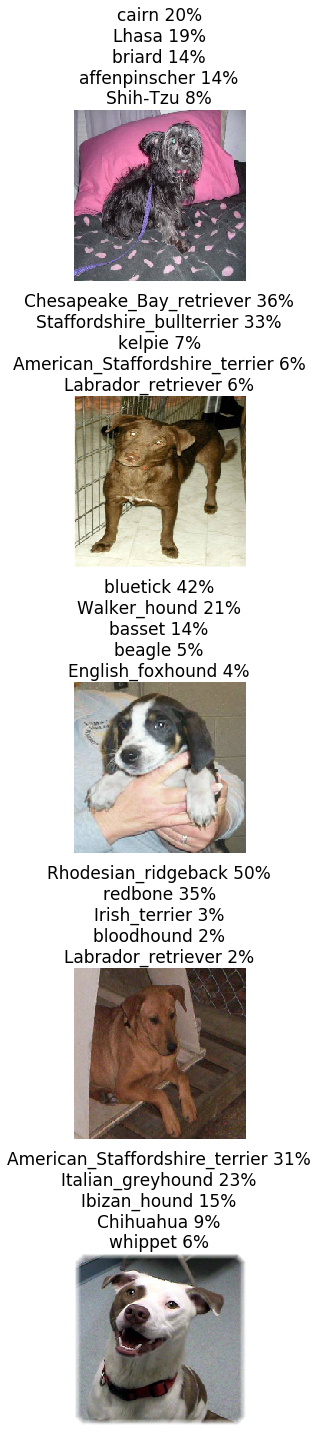

In [21]:
fig, ax = plt.subplots(5, 1, figsize=(15, 20))

for i, fn in enumerate(os.listdir(dog_img_dir)[:5]):
    img_path = os.path.join(dog_img_dir, fn)
    # Get predictions
    preds = predict(conv_full, img_path)
    label = '\n'.join([f'{elt[1]} {elt[2]:.0%}' for elt in preds])
    
    # Display image
    plt.subplot(5, 1, i+1)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(label, size=17)
    plt.axis('off')

plt.tight_layout()

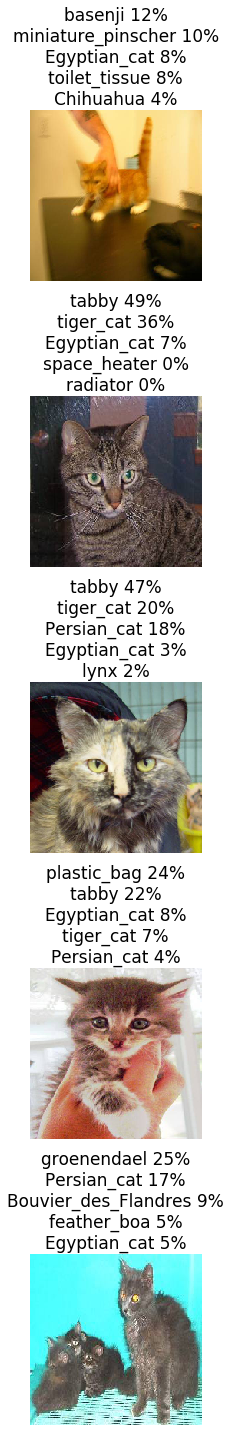

In [22]:
fig, ax = plt.subplots(5, 1, figsize=(15, 20))

for i, fn in enumerate(os.listdir(cat_img_dir)[:5]):
    img_path = os.path.join(cat_img_dir, fn)
    # Get predictions
    preds = predict(conv_full, img_path)
    label = '\n'.join([f'{elt[1]} {elt[2]:.0%}' for elt in preds])
    
    # Display image
    plt.subplot(5, 1, i+1)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(label, size=17)
    plt.axis('off')

plt.tight_layout()

### All the categories for VGG16

In [23]:
img_path = os.path.join(cat_img_dir, os.listdir(cat_img_dir)[0])
[tup[1] for tup in predict(conv_full, img_path, top=1000)]

['basenji',
 'miniature_pinscher',
 'Egyptian_cat',
 'toilet_tissue',
 'Chihuahua',
 'refrigerator',
 'tiger_cat',
 'paper_towel',
 'tabby',
 'tub',
 'space_heater',
 'bathtub',
 'toy_terrier',
 'Doberman',
 'Italian_greyhound',
 'shower_curtain',
 'television',
 'candle',
 'feather_boa',
 'Pembroke',
 'bath_towel',
 'schipperke',
 'Siamese_cat',
 'medicine_chest',
 'washbasin',
 'redbone',
 'soap_dispenser',
 'Cardigan',
 'toilet_seat',
 'microwave',
 'dingo',
 "jack-o'-lantern",
 'German_shepherd',
 'bow_tie',
 'printer',
 'iron',
 'Mexican_hairless',
 'Boston_bull',
 'French_bulldog',
 'radiator',
 'Yorkshire_terrier',
 'Australian_terrier',
 'kelpie',
 'Irish_terrier',
 'Shetland_sheepdog',
 'cowboy_hat',
 'hand_blower',
 'toaster',
 'wall_clock',
 'piggy_bank',
 'sliding_door',
 'American_Staffordshire_terrier',
 'Norwich_terrier',
 'vizsla',
 'screen',
 'red_fox',
 'malinois',
 'plastic_bag',
 'Ibizan_hound',
 'window_shade',
 'remote_control',
 'bookcase',
 'wok',
 'window_scree

#### Make prediction on something that's not a dog or cat

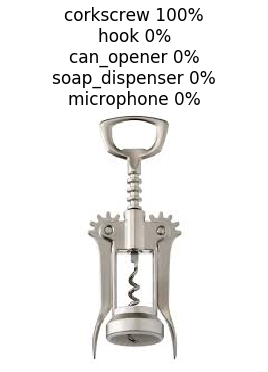

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 20))

img_path = 'resources/corkscrew.jpeg'

# Get predictions
preds = predict(conv_full, img_path)
label = '\n'.join([f'{elt[1]} {elt[2]:.0%}' for elt in preds])

# Display image
plt.subplot(5, 1, 1)
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title(label, size=17)
plt.axis('off')

plt.tight_layout()

View list of ImageNet categories and their heirarchy [here](http://image-net.org/synset?wnid=n07739125)

### Let's use this network to predict Dog or Cat

![](https://camo.githubusercontent.com/2de162f6f3587a0422389355909594413ae17742/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f626f6f6b2e6b657261732e696f2f696d672f6368352f7377617070696e675f66635f636c61737369666965722e706e67)

### Create a model from a pre-trained network
The first time you run this, the data will be downloaded.

In [25]:
# Create a new model with just the convolutional base
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 75s 1us/step


In [26]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

#### Add a new classification (Dense layers) model on top

In [27]:
from keras import models
from keras import layers
from keras import optimizers

# Initialize model
model = models.Sequential()

# Add convolutional base
model.add(conv_base)

# Add new classifier hidden layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))

# Add output layer
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


#### Set up data generators (loaders)

In [29]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

#base_dir = '/data/Documents/Python/keras/data/dogs-vs-cats/dogs-vs-cats_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

train_generator = datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Freeze some layers

In [30]:
conv_base.trainable = False

#### Compile and train the model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

In [ ]:
model.save('cats_and_dogs_small_30_epochs.h5')

#### View Training and Validation Accuracy and Loss

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Retrain for just 4 epochs

In [31]:
train_generator = datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=4,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/4
 - 203s - loss: 0.4860 - acc: 0.7950 - val_loss: 0.3799 - val_acc: 0.8640
Epoch 2/4
 - 190s - loss: 0.3346 - acc: 0.8775 - val_loss: 0.3110 - val_acc: 0.8890
Epoch 3/4
 - 192s - loss: 0.2776 - acc: 0.9005 - val_loss: 0.2829 - val_acc: 0.8980
Epoch 4/4
 - 192s - loss: 0.2432 - acc: 0.9110 - val_loss: 0.2951 - val_acc: 0.8670


In [35]:
model.save('cats_and_dogs_small_4_epochs.h5')

####  Evaluate on test dataset

In [36]:
# Create data loader for test dataset
test_generator = datagen.flow_from_directory(
        # This is the target directory
        test_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Create mapping from class to label
class_map = {v:k for k,v in test_generator.class_indices.items()}
class_map

Found 1000 images belonging to 2 classes.


{0: 'cats', 1: 'dogs'}

In [39]:
# Set `workers` equal to the number of cores in your CPU.
score = model.evaluate_generator(test_generator, steps=50, workers=4, use_multiprocessing=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27869283556938174
Test accuracy: 0.8759999918937683


#### Look at predictions

In [40]:
# Get a batch of test images
samples = test_generator.next()
images, classes = samples[0][:10], samples[1][:10]

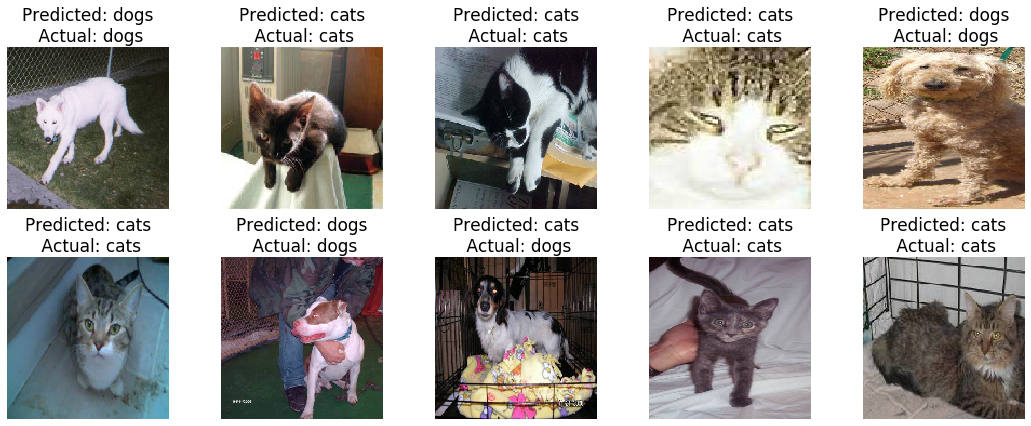

In [41]:
fig, ax = plt.subplots(2, 5, figsize=(15,6))

y_pred = model.predict_classes(images)

for i, tup in enumerate(zip(images, classes)):
    img, label = tup
    plt.subplot(2, 5, i+1)
    plt.imshow(img)#, cmap=cm.gray)
    plt.axis('off')
    plt.title(f'Predicted: {class_map[y_pred[i][0]]}\n Actual: {class_map[label]}', size=17)

plt.tight_layout()

### Ways to improve the model
- Fine tuning
- Data augmentation
- Larger dataset
- Adjust hyperparameters